In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in Attribute Information:

#Only 14 attributes used:

#age : Patient age in years
#sex : sex (1 = male; 0 = female)
#cp : cp: chest pain type
    #     -- Value 1: typical angina 
   #      -- Value 2: atypical angina 
  #       -- Value 3: non-anginal pain 
 #        -- Value 4: asymptomatic
#trestbps : resting blood pressure (in mm Hg on admission to the hospital)
#chol : serum cholestoral in mg/dl
#fbs : (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
#restecg : resting electrocardiographic results
   #      -- Value 0: normal 
  #       -- Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV) 
 #        -- Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria 
#thalach : maximum heart rate achieved
#exang : exercise induced angina (1 = yes; 0 = no)
#oldpeak : ST depression induced by exercise relative to rest
#slope : the slope of the peak exercise ST segment
  #     -- Value 1: upsloping 
 #      -- Value 2: flat 
#       -- Value 3: downsloping 
#ca : number of major vessels (0-3) colored by flourosopy
#thal : 3 = normal; 6 = fixed defect; 7 = reversable defect
#target  (the predicted attribute) : diagnosis of heart disease (angiographic disease status)
 #  -- Value 0: < 50% diameter narrowing  No Disease
#   -- Value 1: > 50% diameter narrowing  With Disease

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

['heart.csv']


In [2]:
df = pd.read_csv("../input/heart.csv")
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [4]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null int64
sex         303 non-null int64
cp          303 non-null int64
trestbps    303 non-null int64
chol        303 non-null int64
fbs         303 non-null int64
restecg     303 non-null int64
thalach     303 non-null int64
exang       303 non-null int64
oldpeak     303 non-null float64
slope       303 non-null int64
ca          303 non-null int64
thal        303 non-null int64
target      303 non-null int64
dtypes: float64(1), int64(13)
memory usage: 33.2 KB


In [6]:
## EDA

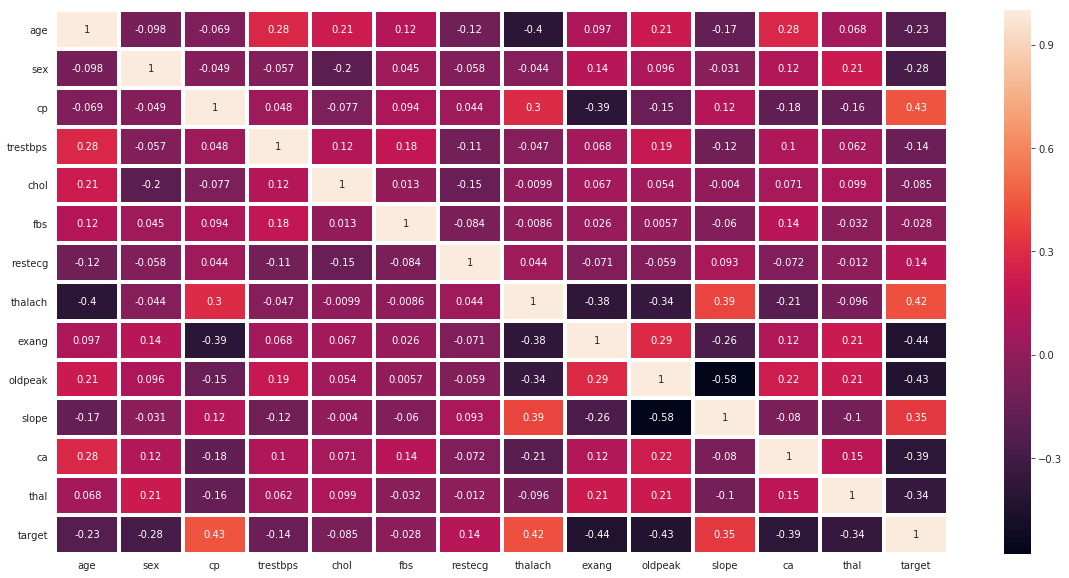

In [7]:
sns.set_style('whitegrid')
%matplotlib inline
plt.figure(figsize = (20,10))
sns.heatmap(df.corr(),annot= True, linewidth = 3,)

Text(0.5,0,'No Heart disease                 Heart Disease')

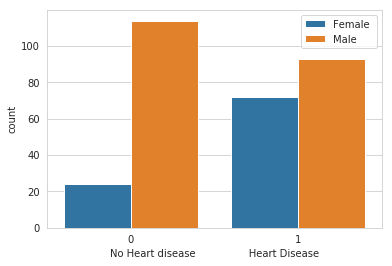

In [8]:
sns.countplot(x ='target', data= df, hue = 'sex')
plt.legend(['Female ','Male'])
plt.xlabel ( 'No Heart disease                 Heart Disease')

In [9]:
df.nunique()

age          41
sex           2
cp            4
trestbps     49
chol        152
fbs           2
restecg       3
thalach      91
exang         2
oldpeak      40
slope         3
ca            5
thal          4
target        2
dtype: int64

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/opt/conda/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/opt/conda/lib/python3.6/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


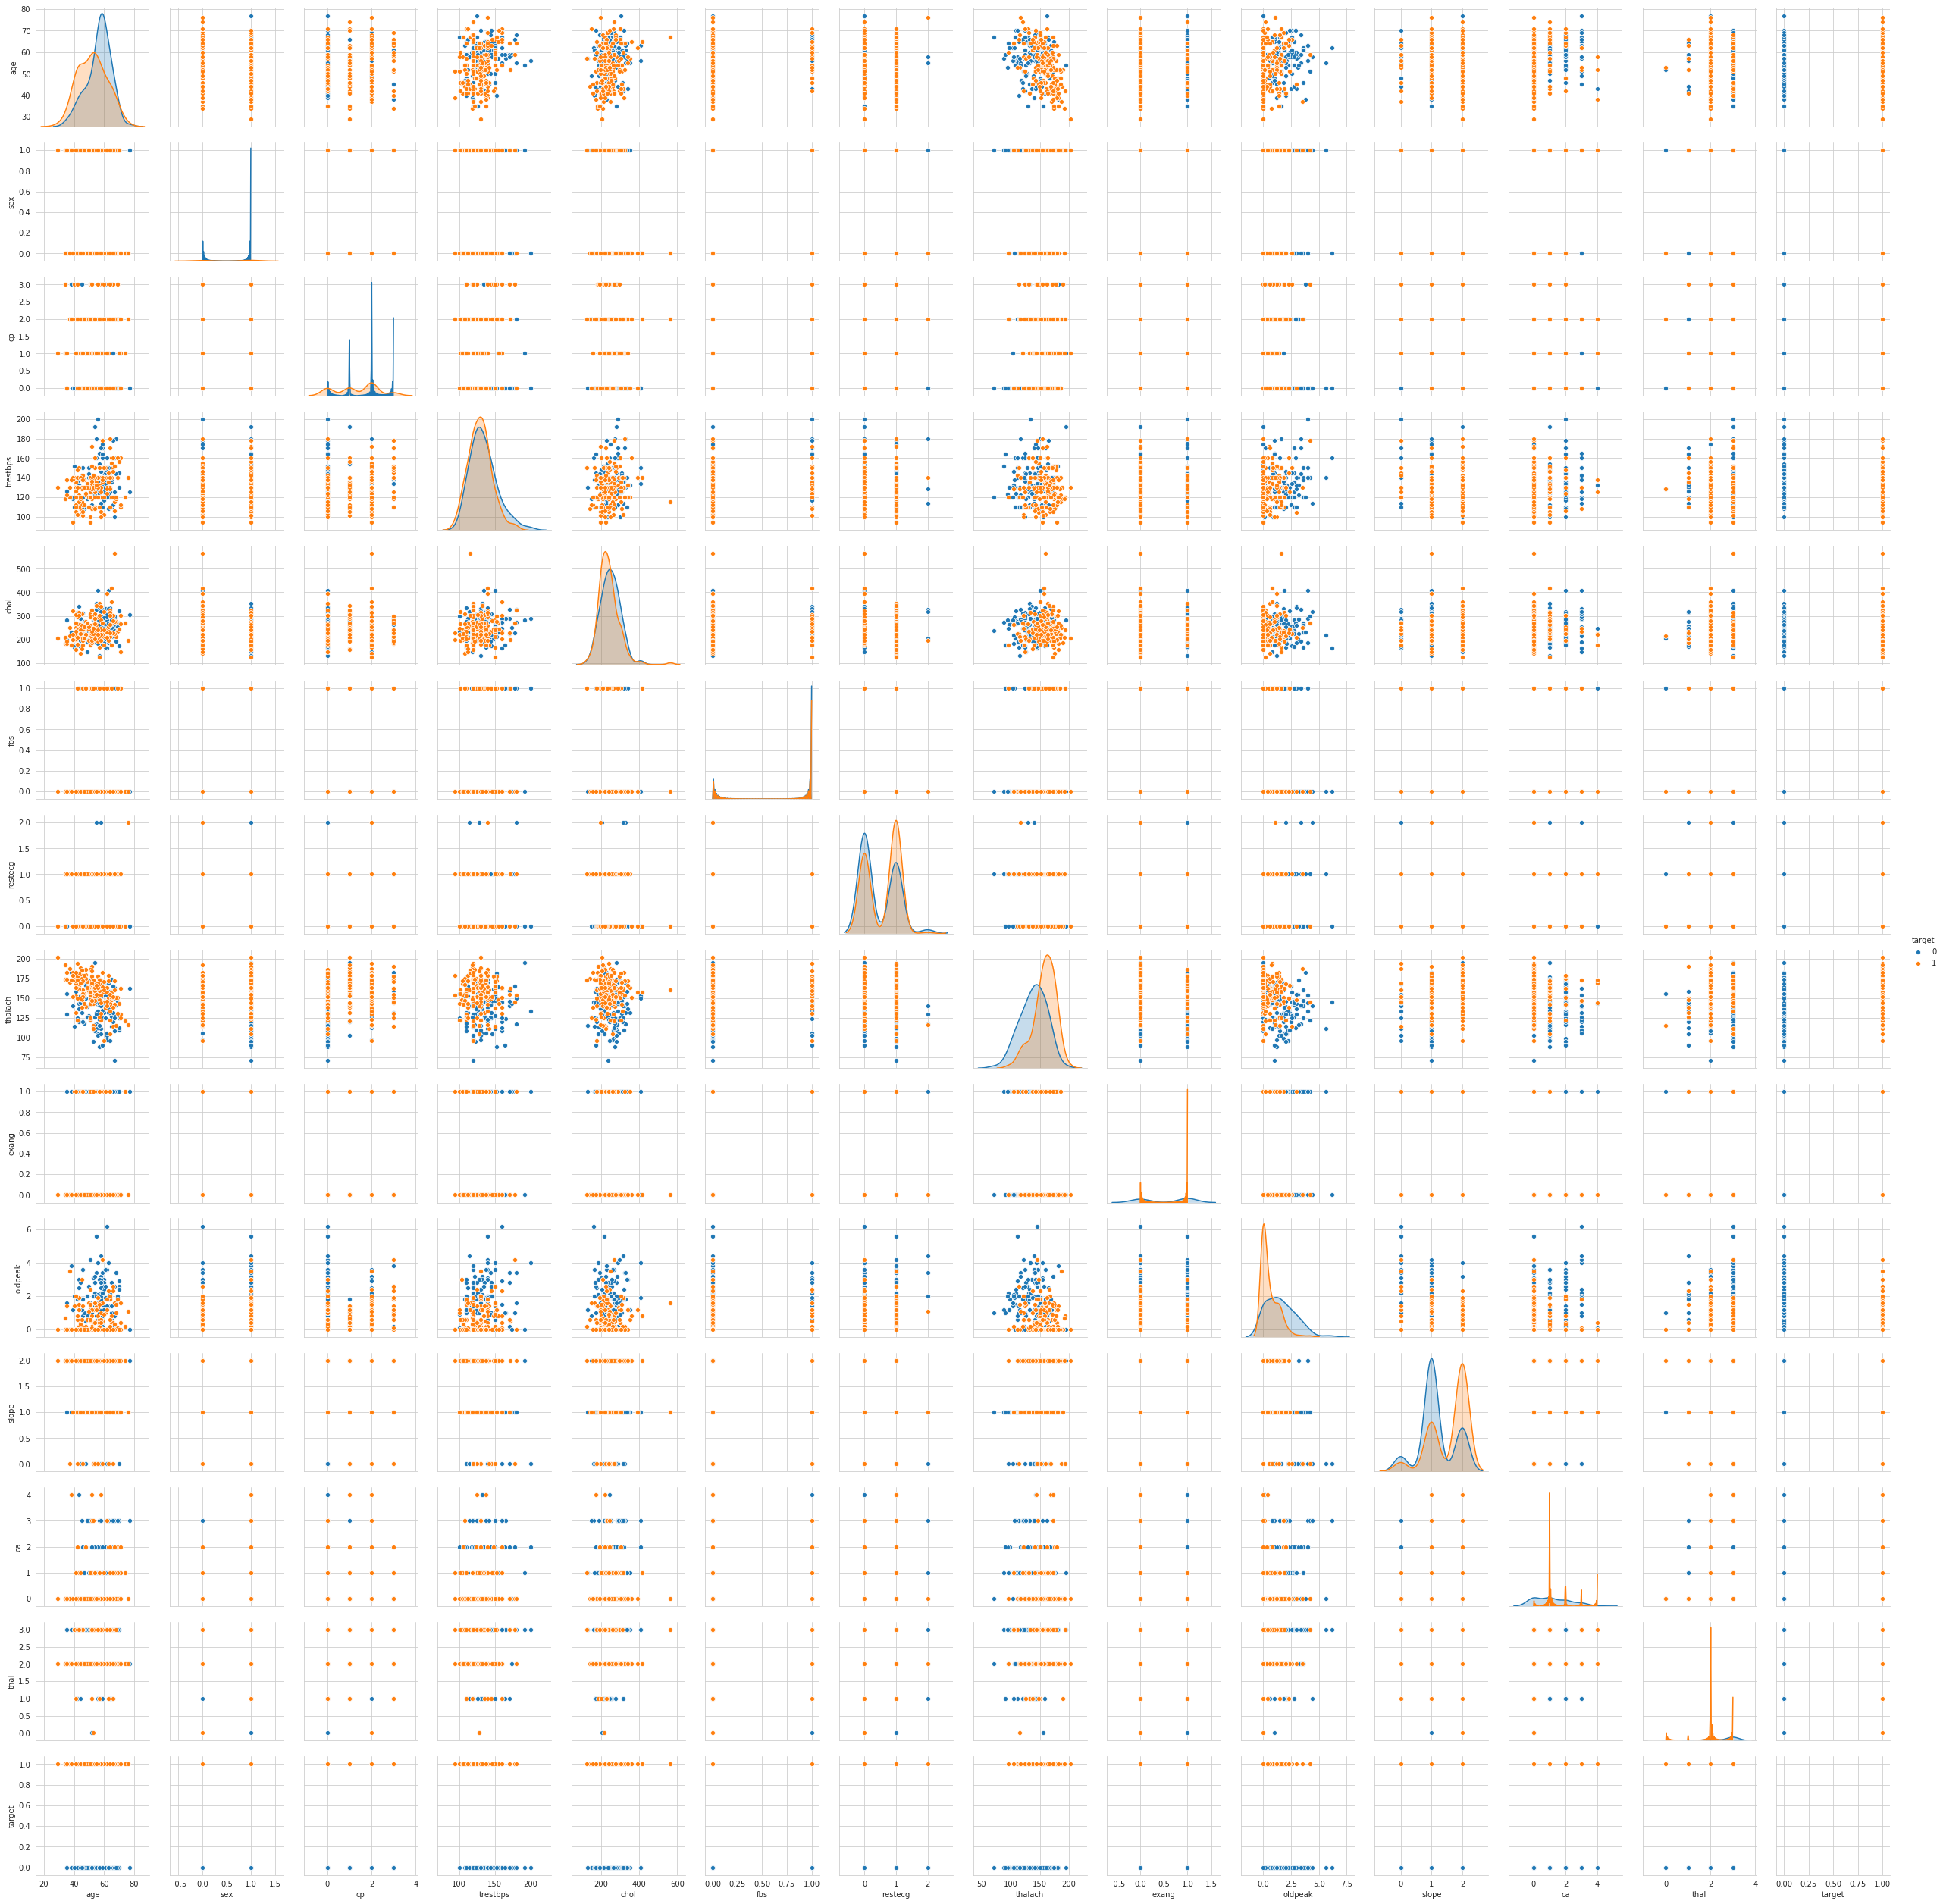

In [10]:
sns.pairplot(df, hue = 'target')
import warnings
warnings.filterwarnings("ignore")

In [11]:
df['age'].describe()

count    303.000000
mean      54.366337
std        9.082101
min       29.000000
25%       47.500000
50%       55.000000
75%       61.000000
max       77.000000
Name: age, dtype: float64

In [12]:
df['Age_Category']= pd.cut(df['age'],bins=list(np.arange(25, 85, 5)))

In [13]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,Age_Category
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1,"(60, 65]"
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1,"(35, 40]"
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1,"(40, 45]"
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1,"(55, 60]"
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1,"(55, 60]"


Text(0.5,1,'Age Distribution of Patients with -ve Heart Diagonsis')

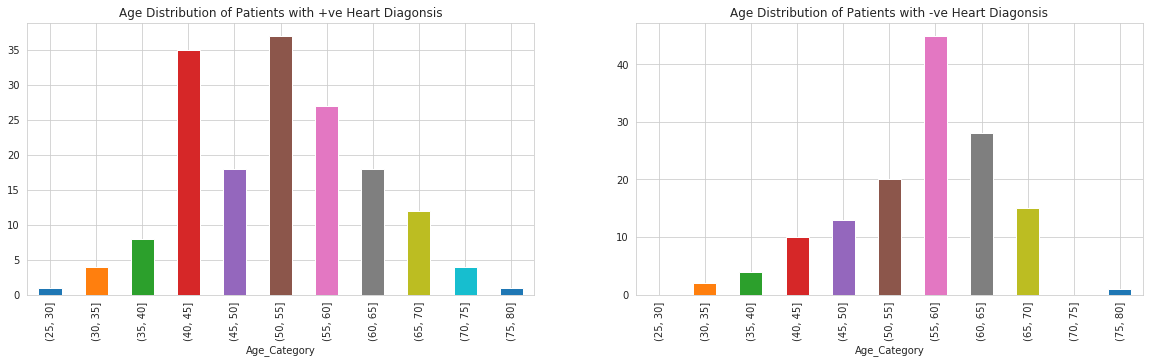

In [14]:
plt.figure(figsize=(20,5))

plt.subplot(121)
df[df['target']==1].groupby('Age_Category')['age'].count().plot(kind='bar')
plt.title('Age Distribution of Patients with +ve Heart Diagonsis')

plt.subplot(122)
df[df['target']==0].groupby('Age_Category')['age'].count().plot(kind='bar')
plt.title('Age Distribution of Patients with -ve Heart Diagonsis')

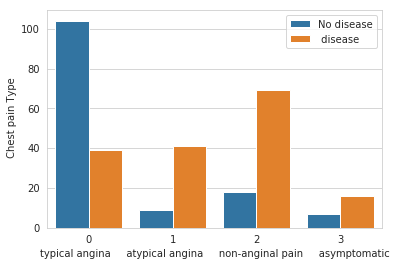

In [15]:
sns.countplot(x = 'cp' ,data = df, hue = 'target' )
plt.xlabel('typical angina     atypical angina     non-anginal pain     asymptomatic')
plt.ylabel(' Chest pain Type')
plt.legend(['No disease' ,         ' disease'])


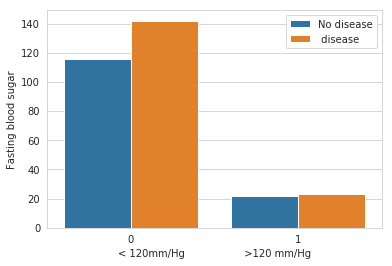

In [16]:
sns.countplot(x = 'fbs' ,data = df, hue = 'target' )
plt.xlabel('< 120mm/Hg                   >120 mm/Hg')
plt.ylabel('Fasting blood sugar')
plt.legend(['No disease' ,         ' disease'])

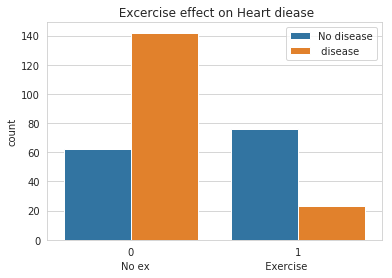

In [17]:
sns.countplot(x = 'exang' ,data = df, hue = 'target' )
plt.xlabel('No ex                                     Exercise')
plt.title(' Excercise effect on Heart diease')
plt.legend(['No disease' ,         ' disease'])

In [18]:
df = pd.get_dummies(df,columns=['sex','cp','fbs','restecg','exang','slope','ca','thal','Age_Category'])

In [19]:
df.head()

,age,trestbps,chol,thalach,oldpeak,target,sex_0,sex_1,cp_0,cp_1,cp_2,cp_3,fbs_0,fbs_1,restecg_0,restecg_1,restecg_2,exang_0,exang_1,slope_0,slope_1,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3,"Age_Category_(25, 30]","Age_Category_(30, 35]","Age_Category_(35, 40]","Age_Category_(40, 45]","Age_Category_(45, 50]","Age_Category_(50, 55]","Age_Category_(55, 60]","Age_Category_(60, 65]","Age_Category_(65, 70]","Age_Category_(70, 75]","Age_Category_(75, 80]"
0,63,145,233,150,2.3,1,0,1,0,0,0,1,0,1,1,0,0,1,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0
1,37,130,250,187,3.5,1,0,1,0,0,1,0,1,0,0,1,0,1,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0
2,41,130,204,172,1.4,1,1,0,0,1,0,0,1,0,1,0,0,1,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0
3,56,120,236,178,0.8,1,0,1,0,1,0,0,1,0,0,1,0,1,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0
4,57,120,354,163,0.6,1,1,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0


In [20]:
df.drop(['age'],axis=1,inplace=True)

In [21]:
df.head()

,trestbps,chol,thalach,oldpeak,target,sex_0,sex_1,cp_0,cp_1,cp_2,cp_3,fbs_0,fbs_1,restecg_0,restecg_1,restecg_2,exang_0,exang_1,slope_0,slope_1,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3,"Age_Category_(25, 30]","Age_Category_(30, 35]","Age_Category_(35, 40]","Age_Category_(40, 45]","Age_Category_(45, 50]","Age_Category_(50, 55]","Age_Category_(55, 60]","Age_Category_(60, 65]","Age_Category_(65, 70]","Age_Category_(70, 75]","Age_Category_(75, 80]"
0,145,233,150,2.3,1,0,1,0,0,0,1,0,1,1,0,0,1,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0
1,130,250,187,3.5,1,0,1,0,0,1,0,1,0,0,1,0,1,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0
2,130,204,172,1.4,1,1,0,0,1,0,0,1,0,1,0,0,1,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0
3,120,236,178,0.8,1,0,1,0,1,0,0,1,0,0,1,0,1,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0
4,120,354,163,0.6,1,1,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0


In [22]:
df.shape

(303, 41)

In [23]:
y = df['target']
x = df.drop(['target'],  axis =1)

In [24]:
df.shape

(303, 41)

In [25]:
x.shape

(303, 40)

In [26]:
y.shape

(303,)

In [27]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(x,y, test_size = 0.2,random_state = 5)

In [28]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [29]:
y_pred = lr.predict(X_test)

In [30]:
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.93      0.93      0.93        30
           1       0.94      0.94      0.94        31

   micro avg       0.93      0.93      0.93        61
   macro avg       0.93      0.93      0.93        61
weighted avg       0.93      0.93      0.93        61



In [31]:
accuracy_score(y_test,y_pred)

0.9344262295081968

In [32]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier()
tree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [33]:
y_pred = tree.predict(X_test)

In [34]:
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.86      0.83      0.85        30
           1       0.84      0.87      0.86        31

   micro avg       0.85      0.85      0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61

0.8524590163934426
[[25  5]
 [ 4 27]]


In [35]:
from sklearn.ensemble import RandomForestClassifier
rad = RandomForestClassifier()
rad.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [36]:
y_pred = rad.predict(X_test)

In [37]:
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.84      0.90      0.87        30
           1       0.90      0.84      0.87        31

   micro avg       0.87      0.87      0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.87      0.87      0.87        61

0.8688524590163934
[[27  3]
 [ 5 26]]
